In [3]:
## Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [4]:
# Cargar el archivo CSV desde la carpeta proporcionada
file_path = './DataSet/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Mostrar la información del dataset para entender su estructura
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000     

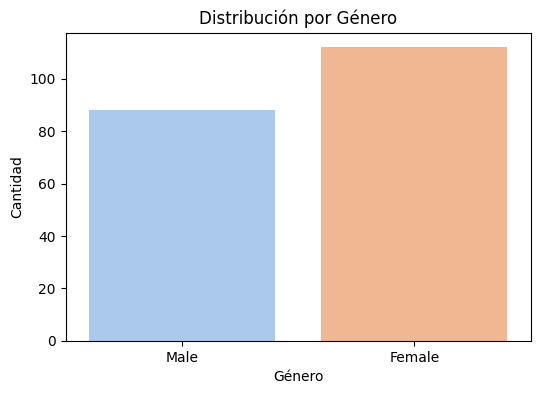

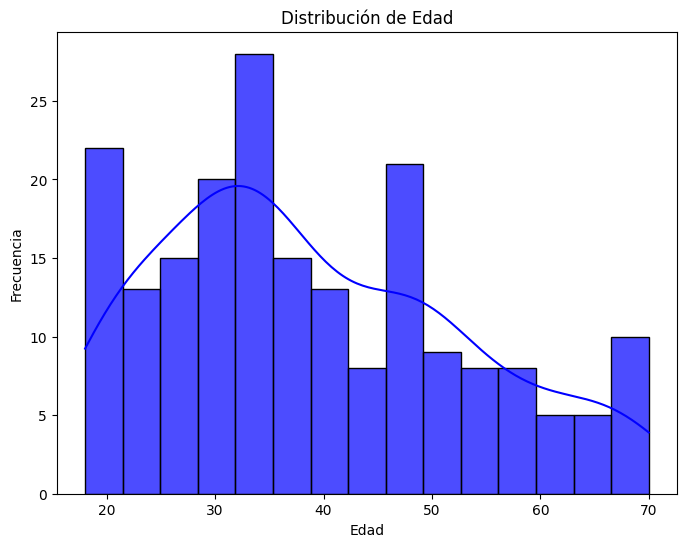

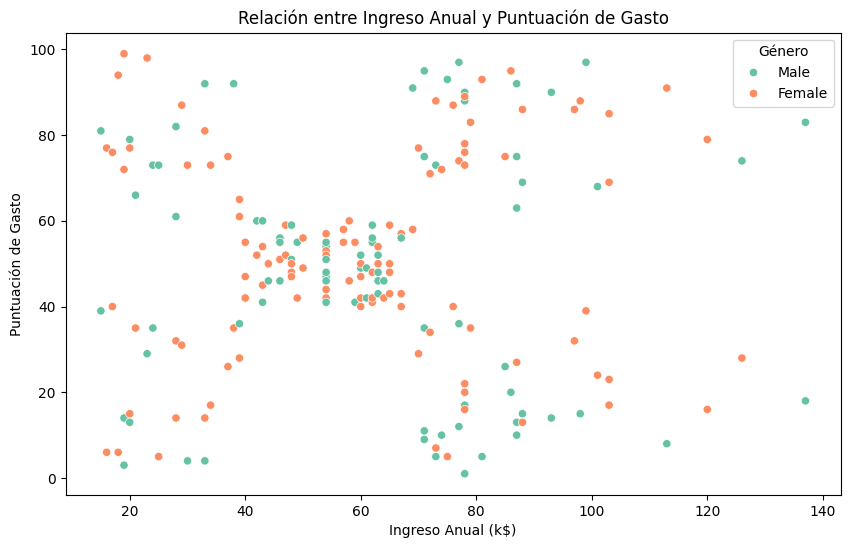

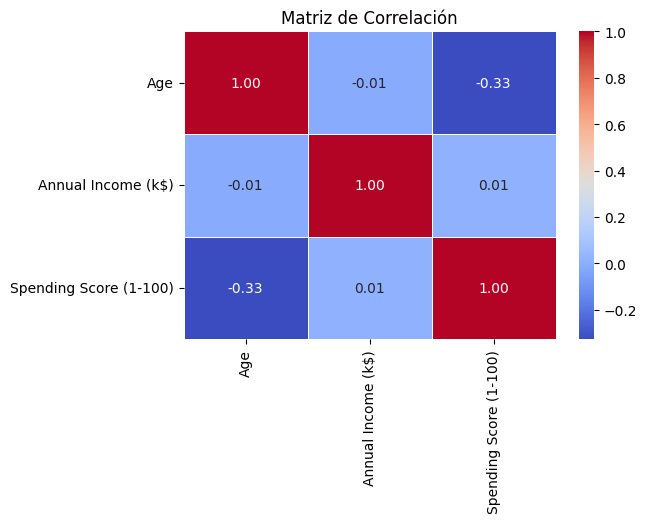

In [5]:
# Análisis exploratorio de los datos

# Distribución del género
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Gender', palette='pastel', dodge=False)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# Distribución de la edad
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=15, color='blue', alpha=0.7)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Ingreso Anual y Puntuación de Gasto
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
plt.title('Relación entre Ingreso Anual y Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Género')
plt.show()

# Correlación entre variables numéricas
corr_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [6]:
# Preprocesamiento de los datos

# Codificación de la columna 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Selección de características relevantes
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalamiento de los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Conversión a DataFrame para facilitar la visualización
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Comprobación de los datos escalados
scaled_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


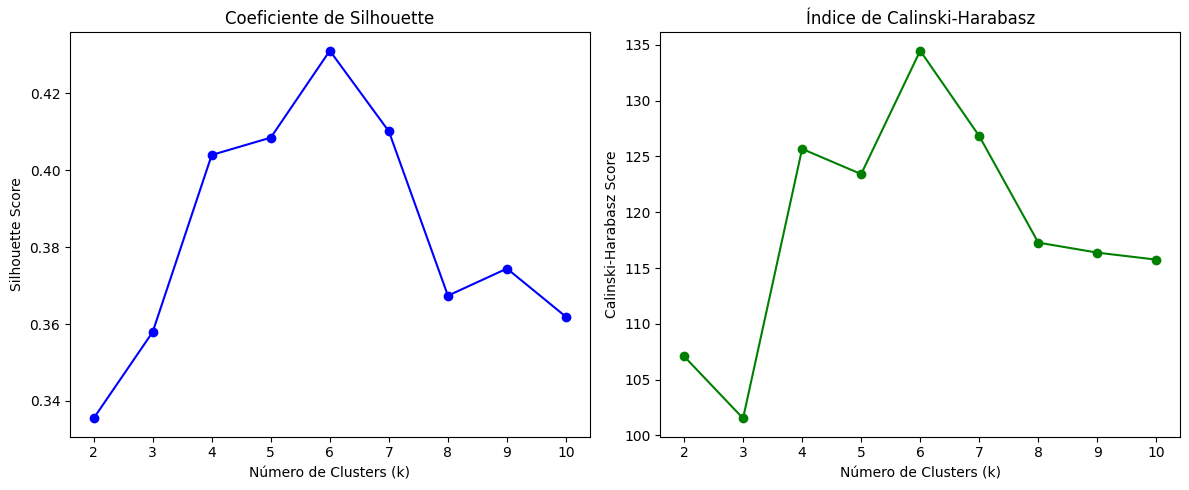

In [7]:
# Entrenamiento del modelo K-Means y evaluación

# Evaluación del número óptimo de clusters (k)
silhouette_scores = []
calinski_scores = []
k_values = range(2, 11)  # Probar valores de k desde 2 hasta 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Calcular métricas de evaluación
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))
    calinski_scores.append(calinski_harabasz_score(scaled_features, cluster_labels))

# Visualización de las métricas para seleccionar el número óptimo de clusters
plt.figure(figsize=(12, 5))

# Coeficiente de Silhouette
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')

# Índice de Calinski-Harabasz
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_scores, marker='o', linestyle='-', color='green')
plt.title('Índice de Calinski-Harabasz')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

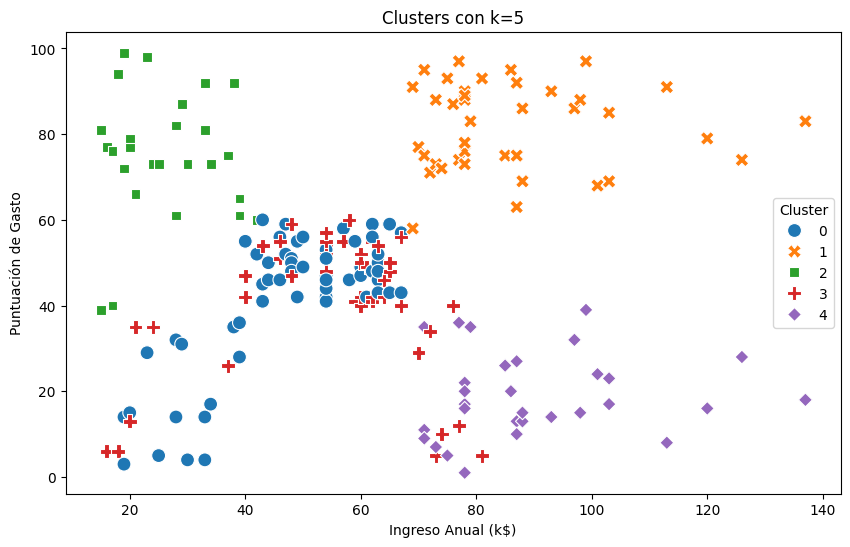

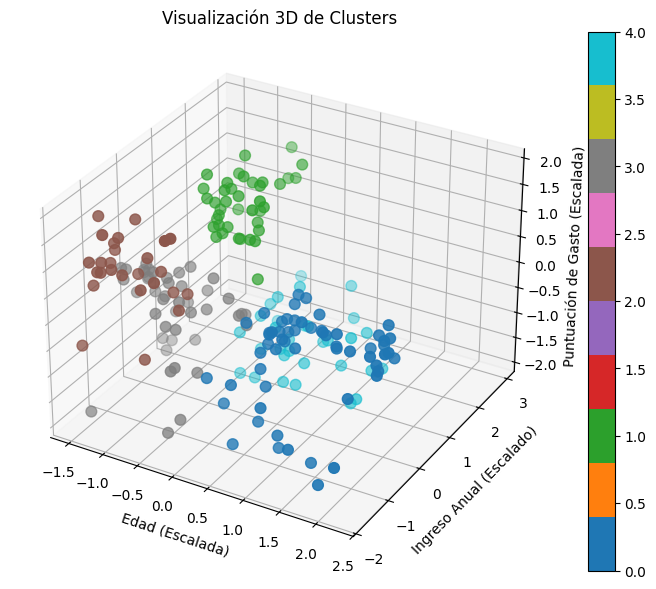

Silhouette Score: 0.40846873777345605
Calinski-Harabasz Score: 123.41870976849417


In [8]:
# Determinar el número óptimo de clusters según las métricas graficadas
optimal_k = 5

# Entrenar el modelo K-Means con k óptimo
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(scaled_features)

# Agregar los clusters como una nueva columna al DataFrame original
data['Cluster'] = clusters

# Visualización de los clusters en un plano 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='tab10', style='Cluster', s=100)
plt.title(f'Clusters con k={optimal_k}')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Cluster')
plt.show()

# Visualización en 3D opcional si se desea incluir todas las variables importantes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2], 
                c=clusters, cmap='tab10', s=60)
plt.colorbar(sc)
ax.set_title('Visualización 3D de Clusters')
ax.set_xlabel('Edad (Escalada)')
ax.set_ylabel('Ingreso Anual (Escalado)')
ax.set_zlabel('Puntuación de Gasto (Escalada)')
plt.show()

# Evaluación final del modelo
final_silhouette = silhouette_score(scaled_features, clusters)
final_calinski = calinski_harabasz_score(scaled_features, clusters)

print("Silhouette Score:", final_silhouette)
print("Calinski-Harabasz Score:", final_calinski)